# 프로젝트 - 모두 카페 꼼꼼히 살펴보기

In [1]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

## 1. 데이타 불러오기

In [2]:
# 데이터 호출하기
entry_data = pd.read_csv('./data/moducafe/entry_data.csv')
sales_data = pd.read_csv('./data/moducafe/sales_data.csv')
item_data = pd.read_csv('./data/moducafe/item_data.csv')
item_entry_data = pd.read_csv('./data/moducafe/item_entry_data.csv')

In [3]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [8]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [6]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


## 2. 데이타 분석하기

### 2-1 필수 문제 1 월별 매출액 추세

- 필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)   
월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.   
힌트: groupby() 함수를 사용하세요.   

In [9]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data.copy()
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]

In [12]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['payment'] = temp_var['결제금액'].str.replace(',','')

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['payment']=temp_var['payment'].astype('int64')

# temp_var의 payment열을 date 기준으로 집계하기
payment_data =temp_var['payment'].groupby(temp_var['date']).sum()

In [13]:
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: payment, dtype: int64

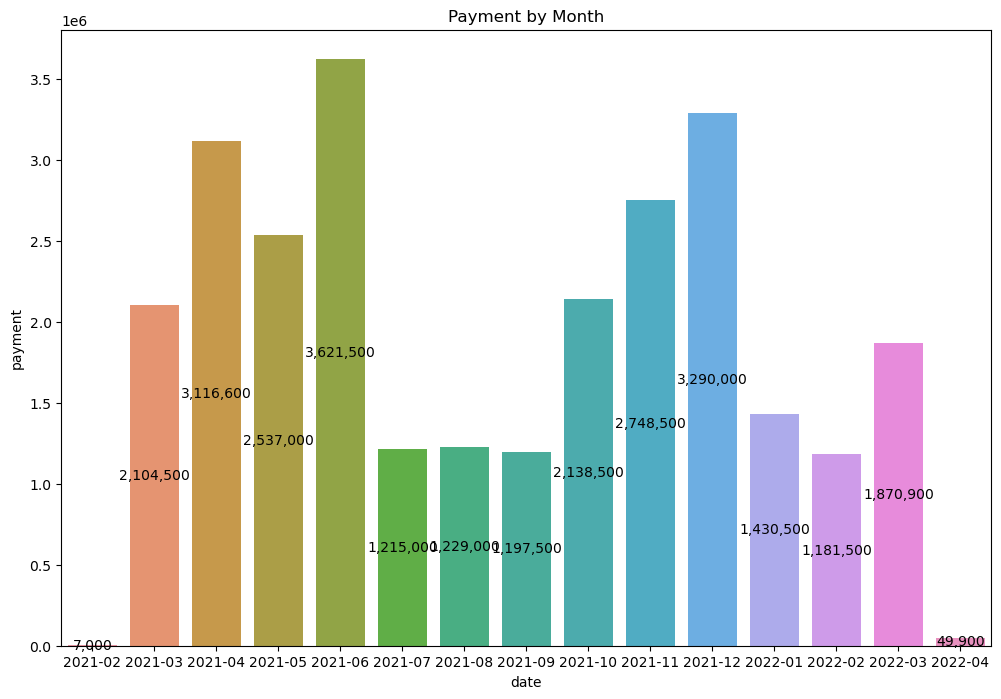

In [14]:
# 집계 결과를 시각화하기
plt.figure(figsize=(12,8))

ax= sns.barplot(data=payment_data.reset_index(), x ='date', y='payment' )
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment by Month')
plt.show()

### 2-2  필수 문제 2 가장 인기 있는 음식/음료

- 필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.)   
여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.   
힌트: value_counts() 함수를 사용하세요.   

In [21]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]

items_count= temp_var[temp_var['판매수량']>=1]['상품명'].value_counts()

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count= pd.DataFrame(items_count).sort_values(by ='상품명',ascending=False).iloc[:10,0]
items_count= pd.DataFrame(items_count)
items_count.reset_index(drop=False, inplace=True)
items_count = items_count.rename(columns={"index":"상품명", "상품명":"수량"})

In [22]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


In [28]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


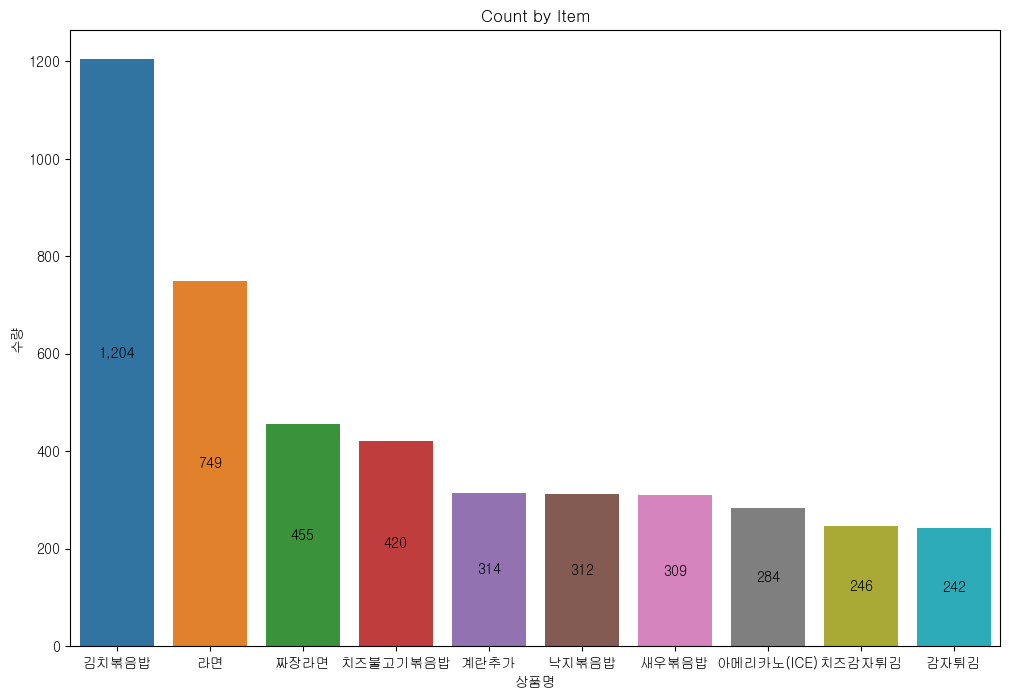

In [29]:
# 집계 결과를 시각화하기
plt.figure(figsize=(12,8))
ax= sns.barplot(data=items_count.reset_index(), x ='상품명' ,y='수량')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Count by Item')
plt.show()

여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
힌트: value_counts() 함수를 사용하세요.

In [24]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = temp_var['payment'].groupby(temp_var['상품명']).sum()

# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment= pd.DataFrame(items_payment).sort_values(by ='payment',ascending=False).iloc[:10,0]
items_payment= pd.DataFrame(items_payment)
items_payment.reset_index(drop=False, inplace=True)

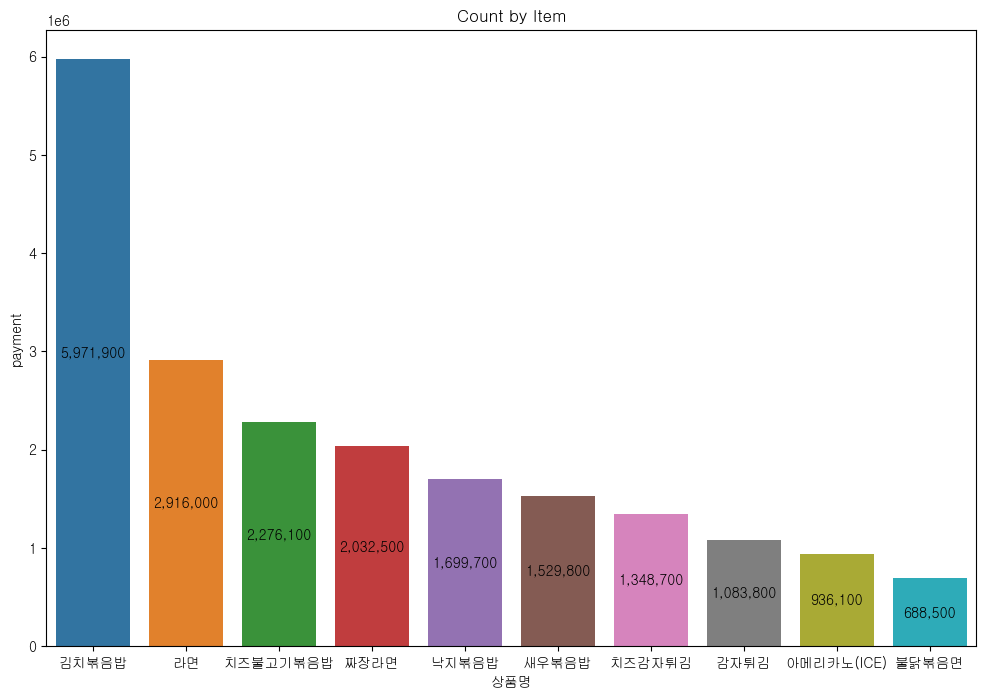

In [30]:
# 집계 결과 시각화하기
plt.figure(figsize=(12,8))
ax= sns.barplot(data=items_payment, x ='상품명' ,y='payment')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Count by Item')
plt.show()

### 2-3  필수 문제 3 가장 많이 팔린 입장권 종류

- 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)   
여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.   
힌트: value_counts() 함수를 사용하세요.   

In [26]:
# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기

temp_var = entry_data.copy()
# temp_var의 금액을 숫자형태로 변환하기

temp_var['금액'] = temp_var['금액'].astype('int64')
# temp_var의 금액을 요금제명을 기준으로 집계하기

tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets= pd.DataFrame(tickets).sort_values(by ='금액',ascending=False).iloc[:10,0]

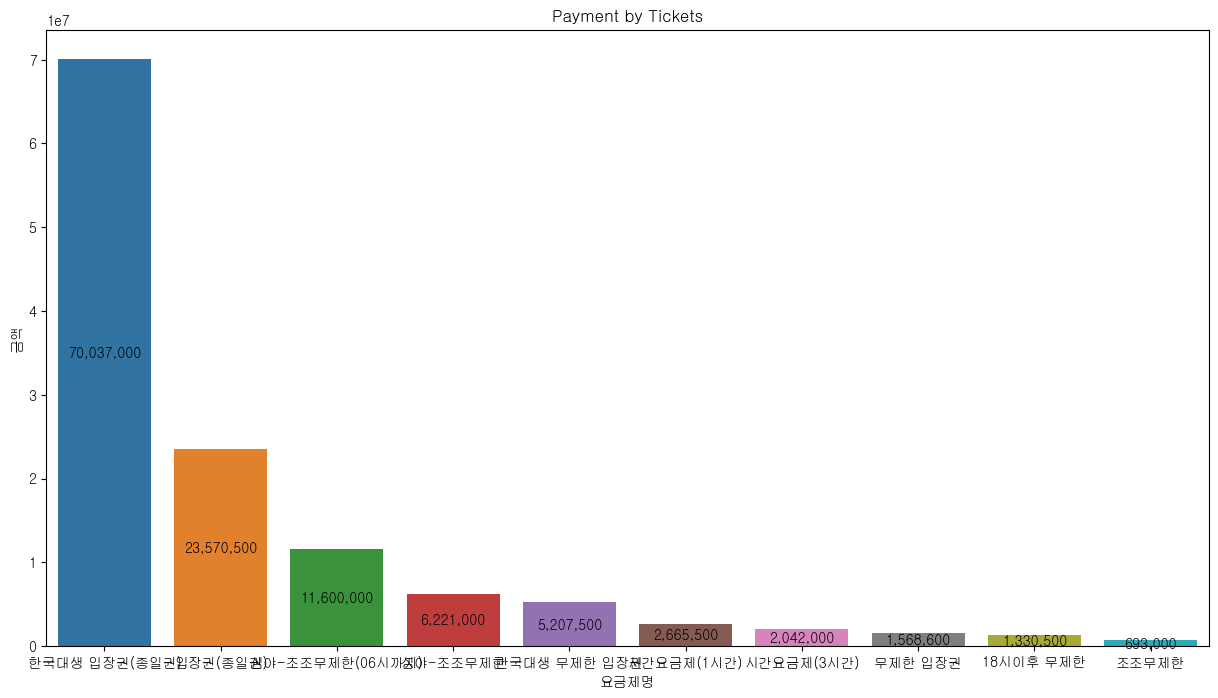

In [31]:
# 집계 결과 시각화하기
plt.figure(figsize=(15,8))
ax= sns.barplot(data=tickets.reset_index(), x ='요금제명' ,y='금액')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment by Tickets')
plt.show()


### 2-4  필수 문제 4 단골 고객 관리
- 필수문제 4 단골 고객 관리   
  주기적으로 자주 방문하는 고객에 대한 집계   
  향후 단골 고객 관리를 위한 데이타 현황 파악   

In [56]:
# 단골고객 관리
regular_customer = entry_data.groupby(entry_data['고객'])['이용'].count().sort_values(ascending=False).iloc[:10]


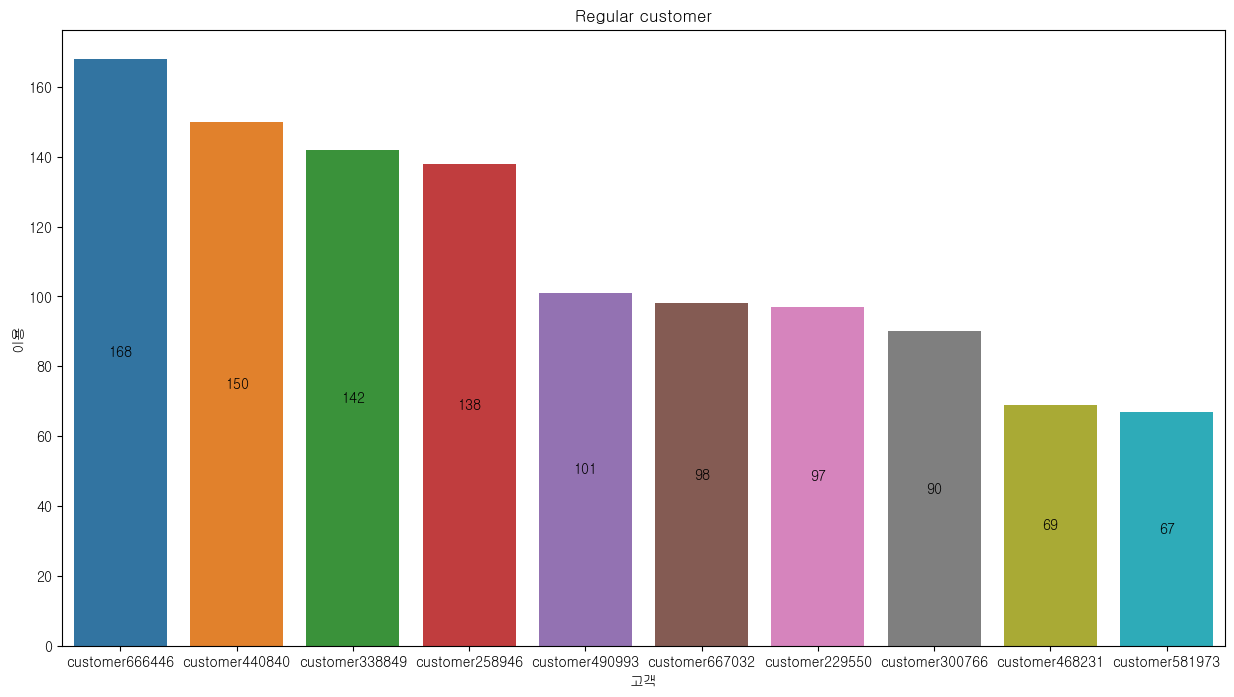

In [58]:
# 집계 결과 시각화하기
plt.figure(figsize=(15,8))
ax= sns.barplot(data=regular_customer.reset_index(), x ='고객' ,y='이용')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Regular customer')
plt.show()

# 회고

- 모두카페의 매출 정보를 기반한 문제정의와 데이타 분석의 과정을 재미있게 진행했다. 
- 시나리오가 몰입감이 있고, 실제 문제 상황을 상상하며 한발한발 데이타 조회와 시각화를 진행했다.